# A. Посчитать лгунов в стране
---

В государстве живёт 10 000 человек. Они делятся на правдолюбов и лгунов. Правдолюбы говорят правду с вероятностью 80%, а лгуны — с вероятностью 40%. Государство решило подсчитать правдолюбов и лгунов на основе опроса 100 жителей. Каждый раз случайно выбранного человека спрашивают: «Вы лгун?» — и записывают ответ. Однако один человек может поучаствовать в опросе несколько раз. Если житель уже участвовал в опросе — он отвечает то же самое, что и в первый раз. Мы знаем, что правдолюбов 70%, а лгунов 30%. Какая вероятность того, что государство недооценит количество лгунов, т. е. опрос покажет, что лгунов меньше 30%? Дайте ответ в процентах с точкой в качестве разделителя, результат округлите до сотых (пример ввода: 00.00).

In [1]:
# всего
N = 10000

# вероятность лжи/правды для правдолюбов
p_tt_t = 0.8
p_tt_f = 1- p_tt_t

# вероятность лжи/правды для лгунов
p_ff_t = 0.4
p_ff_f = 1- p_ff_t

# выборка
n = 100

# доли лгунов/правдолюбов
tt = 0.7
ff = 0.3

$$P(x_{ff}<0.3) = F(0.3) - ?$$

In [2]:
# кол-во лгунов/правдолюбов в общем
N_tt = N * tt
N_ff = N * ff

# кол-во лгунов/правдолюбов в выборке
n_tt = n * tt
n_ff = n * ff

In [5]:
import scipy.special

In [6]:
# кол-во способов выбрать 100 из 10000
N_n = scipy.special.binom(N, n)
N_n

6.520846924611369e+241

In [8]:
# кол-во способов выбрать 1 из 100
n_1 = scipy.special.binom(n, 1)
n_1

100.0

In [9]:
# кол-во способов выбрать все вместе
choice = N_n * n_1
choice

6.520846924611369e+243

# вы лгун?
правдолюб: нет - правда

правдолюб: да - ложь

---
лгун: да - правда

лгун: нет - ложь

In [17]:
# вероятность что рандомный чел говорит да
p_yes = tt*p_tt_f+ff*p_ff_t

In [18]:
# вероятность что рандомный чел говорит нет
p_no = tt*p_tt_t+ff*p_ff_f

In [19]:
# вероятность что рандомный чел говорит правду
p_t = tt*p_tt_t+ff*p_ff_t

In [20]:
# вероятность что рандомный чел говорит ложь
p_f = tt*p_tt_f+ff*p_ff_f

# B. Театральный сезон и телефоны
Международный сервис по продаже билетов решил подвести итоги театрального сезона. В качестве одной из метрик руководитель проекта хочет посчитать количество пользователей, которые покупали билеты на разные спектакли.
При покупке билета пользователь указывает номер своего телефона. Необходимо найти спектакль с наибольшим числом уникальных телефонных номеров. И посчитать количество соответствующих уникальных телефонных номеров.
Зарегистрироваться на направление Аналитика и другие треки чемпионата вы можете на сайте Yandex Cup.

__Формат ввода__

Логи покупок доступны в файле ticket_logs.csv. В первом столбце название спектакля из базы сервиса. Во втором - номер телефона, который оставил пользователь при покупке. Отметим, что в целях конспирации телефонные коды стран заменены на необслуживаемые в настоящий момент зоны.

__Формат вывода__

Число уникальных номеров.

In [26]:
import pandas as pd

In [32]:
tickets = pd.read_csv('ticket_logs.csv', header = None)
tickets.columns = ['perf', 'phone']
tickets.head()

perf              phone
0                 Кошки       +88029264576
1                 Норма     8805-630-71-19
2        Евгений Онегин  8-(802)-235-30-28
3  Вестсайдская история    8-803-151-78-95
4             Дон Кихот    8-802-311-48-72

In [67]:
tickets['phone'] = tickets['phone'].str.replace('-', '')
tickets['phone'] = tickets['phone'].str.replace('(', '')
tickets['phone'] = tickets['phone'].str.replace(')', '')

In [66]:
gr_tick = tickets.groupby('perf')['phone'].nunique()
gr_tick
gr_tick.sort_values(ascending=False, inplace=True)
gr_tick.head()

perf
Кошки               181
Дон Кихот           175
Спящая красавица    175
Лебединое озеро     171
Кармен              171
Name: phone, dtype: int64

# ответ: 181

# C. Рассчитать pFound
В архиве содержится три текстовых файла:

- qid_query.tsv — $id$ запроса и текст запроса, разделённые табуляцией;
- qid_url_rating.tsv — $id$ запроса, URL документа, релевантность документа запросу;
- hostid_url.tsv — $id$ хоста и URL документа.

Нужно вывести текст запроса с максимальным значением метрики $pFound$, посчитанной по топ-10 документов. Выдача по запросу формируется по следующим правилам:

- С одного хоста может быть только один документ на выдаче. Если для запроса есть несколько документов с одним и тем же id хоста — берется максимально релевантный документ (а если несколько документов максимально релевантны, берется любой).
- Документы по запросу сортируются по убыванию релевантности.
- Если у нескольких документов с разных хостов релевантность одинакова, их порядок может быть произвольным.

Формула для расчёта:

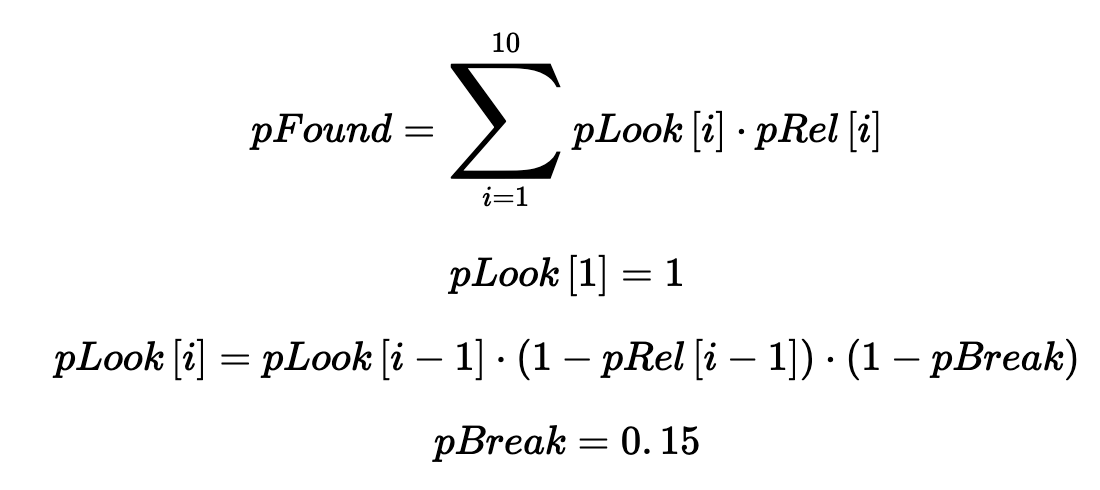

__Формат вывода__

Текст запроса с максимальным значением метрики.

Например, для open_task.zip правильный ответ:
гугл переводчик

In [116]:
path1 = 'data/hidden_task/'

In [117]:
#   𝑖𝑑  запроса и текст запроса, разделённые табуляцией;
qid_query = pd.read_csv(path1 + 'qid_query.tsv', sep = '\t', header = None, names = ['id', 'text'])
qid_query = qid_query.set_index('id')
# qid_query.head()

In [118]:
#   𝑖𝑑  запроса, URL документа, релевантность документа запросу;
qid_url_rating = pd.read_csv(path1 + 'qid_url_rating.tsv', sep = '\t', header = None,
                             names = ['id', 'url', 'rating'])
qid_url_rating = qid_url_rating.set_index('id')
# qid_url_rating.head()

In [119]:
#   𝑖𝑑  хоста и URL документа.
hostid_url = pd.read_csv(path1 + 'hostid_url.tsv', sep = '\t', header = None,
                        names = ['id_host', 'url'])
# hostid_url = hostid_url.set_index('id_host')
# hostid_url.head()

In [120]:
new = pd.merge(qid_query, qid_url_rating, on='id')
new = new.reset_index()
# new

In [126]:
new1 = pd.merge(new, hostid_url, on='url')
new1

id                           text  \
0    402111  работа фотографом в австралии   
1    402111  работа фотографом в австралии   
2    402111  работа фотографом в австралии   
3    402111  работа фотографом в австралии   
4    402111  работа фотографом в австралии   
..      ...                            ...   
798   99543       КВН "Утомленные солнцем"   
799   99543       КВН "Утомленные солнцем"   
800   99543       КВН "Утомленные солнцем"   
801   99543       КВН "Утомленные солнцем"   
802   99543       КВН "Утомленные солнцем"   

                                                   url  rating  id_host  
0    http://24-job.com/board/job_australia/232-1-2-...    0.07        7  
1    http://24-job.com/board/job_australia/232-1-2-...    0.07        7  
2             http://802351.info/5964-v-avstralii.html    0.00       13  
3                   http://auscommunity.com/blog/jobs/    0.00       53  
4    http://auscommunity.com/tag/%D1%84%D0%BE%D1%82...    0.00       53  
..                                                 ...     ...      ...  
798         http://www.youtube.com/watch?v=QDcomRWogFE    0.14     1155  
799         http://www.youtube.com/watch?v=Y3n47xZb0b4    0.14     1155  
800        http://www.yuga.ru/articles/culture?id=3378    0.00     1156  
801  http://www.zexe.de/modules.php?name=Pages&pa=s...    0.14     1160  
802        http://zapil77.by.ru/kubok-kvn-g-dubna.html    0.00     1182  

[803 rows x 5 columns]

In [125]:
new1.pivot_table(index=['id_host','id']
)

rating
id_host id              
1       70357   0.000000
5       49587   0.000000
7       402111  0.070000
8       690263  0.140000
10      5308    0.000000
...                  ...
1180    690263  0.203333
1182    99543   0.000000
1184    63179   0.000000
1188    48815   0.140000
1189    58989   0.000000

[607 rows x 1 columns]